<a href="https://www.kaggle.com/code/mahyararani/mlpclassification?scriptVersionId=110837055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
import time
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/digits/digits.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,label,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,...,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13
0,7,0,0,0,0,0,0,0,0,0,...,0,0,41,88,3,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(6000, 197)

In [5]:
df.describe()

,label,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,...,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13
count,6000.000000,6000.0,6000.0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.0
mean,4.486500,0.0,0.0,0.0,0.003333,0.025833,0.044667,0.068167,0.085167,0.087167,...,1.740500,3.094000,3.426333,2.628833,1.525500,0.688167,0.280167,0.030833,0.0,0.0
std,2.917288,0.0,0.0,0.0,0.186176,1.242748,1.538311,2.331757,2.344887,2.420650,...,12.976372,17.261909,17.341973,15.705344,11.835062,7.703970,4.633744,1.166523,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,9.000000,0.0,0.0,0.0,12.000000,78.000000,77.000000,103.000000,93.000000,102.000000,...,238.000000,240.000000,232.000000,252.000000,223.000000,225.000000,126.000000,69.000000,0.0,0.0


In [6]:
df.isnull().sum()

label    0
0x0      0
0x1      0
0x2      0
0x3      0
        ..
13x9     0
13x10    0
13x11    0
13x12    0
13x13    0
Length: 197, dtype: int64

In [7]:
df.dtypes

label    int64
0x0      int64
0x1      int64
0x2      int64
0x3      int64
         ...  
13x9     int64
13x10    int64
13x11    int64
13x12    int64
13x13    int64
Length: 197, dtype: object

In [8]:
X = df.drop(['label'], axis = 1)
y = df['label']

# Modeling
## ReLu

### 2 hidden layer with 20 nodes, ReLu solver

In [9]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000, 
                            solver='lbfgs', activation="relu", random_state=2)
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)

    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))






recall    = 0.9100 ±0.0102
precision = 0.9109 ±0.0104
f1        = 0.9100 ±0.0103


### 2 hidden layer with 100 nodes, ReLu solver

In [10]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, 
                            solver='lbfgs', activation="relu", random_state=2) 
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)

    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))






recall    = 0.9395 ±0.0082
precision = 0.9403 ±0.0079
f1        = 0.9396 ±0.0082


### 5 hidden layer with 20 nodes, ReLu solver

In [11]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=1000, 
                            solver='lbfgs', activation="relu", random_state=2)
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)
    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))






recall    = 0.9098 ±0.0099
precision = 0.9104 ±0.0097
f1        = 0.9098 ±0.0100


### 5 hidden layer with 100 nodes, ReLu solver

In [12]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100,100, 100, 100), max_iter=1000, 
                            solver='lbfgs',activation="relu", random_state=2)
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)
    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))






recall    = 0.9378 ±0.0075
precision = 0.9385 ±0.0074
f1        = 0.9379 ±0.0075


## Tanh

### 2 hidden layer with 20 nodes, Tanh solver

In [13]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000, 
                            solver='lbfgs',activation="tanh", random_state=2)
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)
    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))






recall    = 0.9130 ±0.0102
precision = 0.9141 ±0.0104
f1        = 0.9131 ±0.0102


### 2 hidden layer with 100 nodes, Tanh solver

In [14]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, 
                            solver='lbfgs',activation="tanh", random_state=2)
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)

    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))






recall    = 0.9352 ±0.0085
precision = 0.9357 ±0.0084
f1        = 0.9351 ±0.0085


### 5 hidden layer with 20 nodes, Tanh solver

In [15]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=1000, 
                            solver='lbfgs',activation="tanh", random_state=2)
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)
    

    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))






recall    = 0.9055 ±0.0095
precision = 0.9069 ±0.0091
f1        = 0.9056 ±0.0094


### 5 hidden layer with 100 nodes, Tanh solver

In [16]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=1000, 
                            solver='lbfgs',activation="tanh", random_state=2)
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)

    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))






recall    = 0.9397 ±0.0070
precision = 0.9404 ±0.0070
f1        = 0.9397 ±0.0070


# Question 1
## Iterative Size of Layers

### 2 Hidden Layer with ReLu Activation Function

In [17]:
sizes = [20, 40, 60, 80, 100]
ts_relu_2hl = []
for i in sizes:
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []
    start = time.time()

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        mlp_clf = MLPClassifier(hidden_layer_sizes=(i, i), max_iter=1000, 
                                solver='lbfgs', activation="relu", random_state=2)
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)    
        mlp_clf.fit(X_train, y_train)
        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    ts_relu_2hl.append(time.time() - start)
    print(ts_relu_2hl)

[31.416303396224976]
[31.416303396224976, 26.402098417282104]
[31.416303396224976, 26.402098417282104, 71.57929587364197]
[31.416303396224976, 26.402098417282104, 71.57929587364197, 63.47037363052368]
[31.416303396224976, 26.402098417282104, 71.57929587364197, 63.47037363052368, 85.71560049057007]


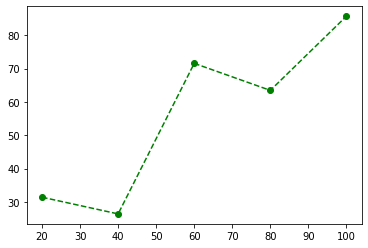

In [18]:
plt.plot(sizes, ts_relu_2hl, 'go--')

### 5 Hidden Layer with ReLu Activation Function

In [19]:
sizes = [20, 40, 60, 80, 100]
ts_relu_5hl = []
for i in sizes:
    start = time.time()
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        mlp_clf = MLPClassifier(hidden_layer_sizes=(i, i, i, i, i), max_iter=1000, 
                                solver='lbfgs', activation="relu", random_state=2)
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)    
        mlp_clf.fit(X_train, y_train)
        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    ts_relu_5hl.append(time.time() - start)
    print(ts_relu_5hl)

[74.18228602409363]
[74.18228602409363, 152.7436878681183]
[74.18228602409363, 152.7436878681183, 175.40447688102722]
[74.18228602409363, 152.7436878681183, 175.40447688102722, 154.84859704971313]
[74.18228602409363, 152.7436878681183, 175.40447688102722, 154.84859704971313, 154.5709948539734]


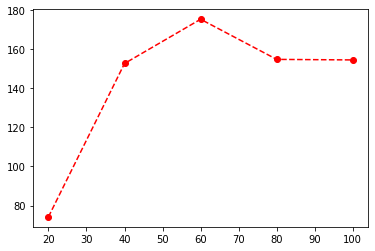

In [20]:
plt.plot(sizes, ts_relu_5hl, 'ro--')

### 2 Hidden Layer with Tanh Activation Function

In [21]:
sizes = [20, 40, 60, 80, 100]
ts_tanh_2hl = []
for i in sizes:
    start = time.time()
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        mlp_clf = MLPClassifier(hidden_layer_sizes=(i, i), max_iter=1000, 
                                solver='lbfgs', activation="tanh", random_state=2)
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)    
        mlp_clf.fit(X_train, y_train)
        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    ts_tanh_2hl.append(time.time() - start)
    print(ts_tanh_2hl)

[17.87618637084961]
[17.87618637084961, 18.418009519577026]
[17.87618637084961, 18.418009519577026, 37.26906085014343]
[17.87618637084961, 18.418009519577026, 37.26906085014343, 38.8791241645813]
[17.87618637084961, 18.418009519577026, 37.26906085014343, 38.8791241645813, 46.99539613723755]


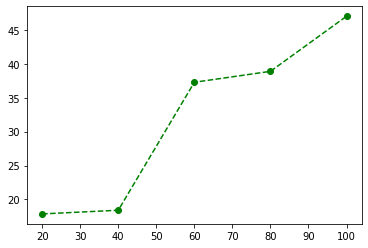

In [22]:
plt.plot(sizes, ts_tanh_2hl, 'go--')

### 5 Hidden Layer with Tanh Activation Function

In [23]:
sizes = [20, 40, 60, 80, 100]
ts_tanh_5hl = []
for i in sizes:
    start = time.time()
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        mlp_clf = MLPClassifier(hidden_layer_sizes=(i, i, i, i, i), max_iter=1000, 
                                solver='lbfgs', activation="tanh", random_state=2)
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)    
        mlp_clf.fit(X_train, y_train)
        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    ts_tanh_5hl.append(time.time() - start)
    print(ts_tanh_5hl)

[58.35532069206238]
[58.35532069206238, 76.33911442756653]
[58.35532069206238, 76.33911442756653, 92.2061493396759]
[58.35532069206238, 76.33911442756653, 92.2061493396759, 104.38275694847107]
[58.35532069206238, 76.33911442756653, 92.2061493396759, 104.38275694847107, 120.37707877159119]


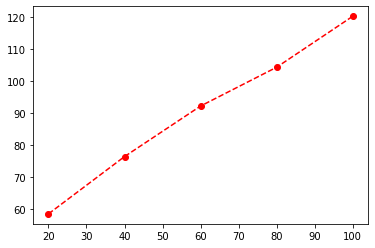

In [24]:
plt.plot(sizes, ts_tanh_5hl, 'ro--')

# Question 2
## Iterative Number of Hidden Layers
### 20 Size of Layers with ReLu Activation Function

In [25]:
number_hl = []
ts_relu_s20 = []
for i in range(5):
    start = time.time()
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []
    number_hl.append(20)

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        mlp_clf = MLPClassifier(hidden_layer_sizes= number_hl, max_iter=1000, 
                                solver='lbfgs', activation="relu", random_state=2)
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)    
        mlp_clf.fit(X_train, y_train)
        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    ts_relu_s20.append(time.time() - start)
    print(ts_relu_s20)
    print(number_hl)


[21.269757747650146]
[20]
[21.269757747650146, 30.099907875061035]
[20, 20]
[21.269757747650146, 30.099907875061035, 39.74860644340515]
[20, 20, 20]
[21.269757747650146, 30.099907875061035, 39.74860644340515, 57.22236371040344]
[20, 20, 20, 20]
[21.269757747650146, 30.099907875061035, 39.74860644340515, 57.22236371040344, 76.26968169212341]
[20, 20, 20, 20, 20]


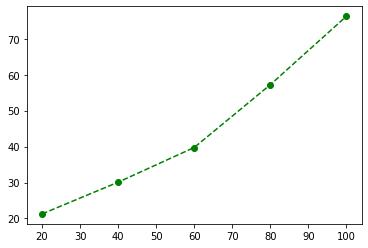

In [26]:
plt.plot(range(20, 101, 20), ts_relu_s20, 'go--')

### 50 Size of Layers with ReLu Activation Function

In [27]:
number_hl = [50]
ts_relu_s50 = []
for i in range(5):
    start = time.time()
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        mlp_clf = MLPClassifier(hidden_layer_sizes= number_hl, max_iter=1000, 
                                solver='lbfgs', activation="relu", random_state=2)
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)    
        mlp_clf.fit(X_train, y_train)
        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    ts_relu_s50.append(time.time() - start)
    print(ts_relu_s50)
    print(number_hl)
    number_hl.append(50)

[27.520314931869507]
[50]
[27.520314931869507, 58.0180344581604]
[50, 50]
[27.520314931869507, 58.0180344581604, 82.53953123092651]
[50, 50, 50]
[27.520314931869507, 58.0180344581604, 82.53953123092651, 111.40973663330078]
[50, 50, 50, 50]
[27.520314931869507, 58.0180344581604, 82.53953123092651, 111.40973663330078, 118.7330641746521]
[50, 50, 50, 50, 50]


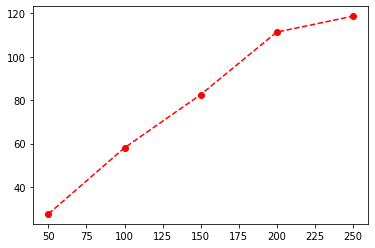

In [28]:
plt.plot(range(50, 251, 50), ts_relu_s50, 'ro--')

### 20 Size of Layers with Tanh Activation Function

In [29]:
number_hl = []
ts_tanh_s20 = []
for i in range(5):
    start = time.time()
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []
    number_hl.append(20)

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        mlp_clf = MLPClassifier(hidden_layer_sizes= number_hl, max_iter=1000, 
                                solver='lbfgs', activation="tanh", random_state=2)
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)    
        mlp_clf.fit(X_train, y_train)
        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    ts_tanh_s20.append(time.time() - start)
    print(ts_tanh_s20)
    print(number_hl)


[13.700725317001343]
[20]
[13.700725317001343, 18.23261523246765]
[20, 20]
[13.700725317001343, 18.23261523246765, 28.296407222747803]
[20, 20, 20]
[13.700725317001343, 18.23261523246765, 28.296407222747803, 44.972389698028564]
[20, 20, 20, 20]
[13.700725317001343, 18.23261523246765, 28.296407222747803, 44.972389698028564, 56.27627086639404]
[20, 20, 20, 20, 20]


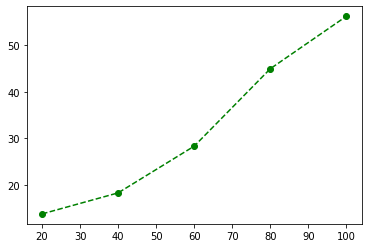

In [30]:
plt.plot(range(20, 101, 20), ts_tanh_s20, 'go--')

### 50 Size of Layers with Tanh Activation Function


In [31]:
number_hl = []
ts_tanh_s50 = []
for i in range(5):
    start = time.time()
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []
    number_hl.append(50)
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        mlp_clf = MLPClassifier(hidden_layer_sizes= number_hl, max_iter=1000, 
                                solver='lbfgs', activation="tanh", random_state=2)
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)    
        mlp_clf.fit(X_train, y_train)
        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    ts_tanh_s50.append(time.time() - start)
    print(ts_tanh_s50)
    print(number_hl)


[20.276499271392822]
[50]
[20.276499271392822, 33.24781346321106]
[50, 50]
[20.276499271392822, 33.24781346321106, 47.642502307891846]
[50, 50, 50]
[20.276499271392822, 33.24781346321106, 47.642502307891846, 66.86352968215942]
[50, 50, 50, 50]
[20.276499271392822, 33.24781346321106, 47.642502307891846, 66.86352968215942, 83.90985798835754]
[50, 50, 50, 50, 50]


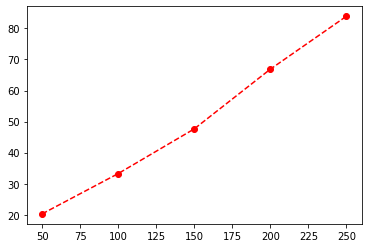

In [32]:
plt.plot(range(50, 251, 50), ts_tanh_s50, 'ro--')

# Question 3

# Question 4

#### What happens if we stop using MinMaxScaler?

In [33]:
X = df.drop(['label'], axis = 1)
y = df['label']
start = time.time()

kfold = model_selection.KFold(5, shuffle=True, random_state=2)
prec, rec, f1 = [], [], []
    
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    mlp_clf = MLPClassifier(hidden_layer_sizes= (10), max_iter=2000, 
                                solver='lbfgs', activation="tanh", random_state=2)
    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)

    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
tanh_simple =time.time() - start

print(tanh_simple)
print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

232.9510395526886
recall    = 0.7392 ±0.0346
precision = 0.7861 ±0.0351
f1        = 0.7508 ±0.0301


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [34]:
X = df.drop(['label'], axis = 1)
y = df['label']
start = time.time()

relu_simple = []

kfold = model_selection.KFold(5, shuffle=True, random_state=2)
prec, rec, f1 = [], [], []
    
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    mlp_clf = MLPClassifier(hidden_layer_sizes= (20, 20), max_iter=1000, 
                                solver='lbfgs', activation="relu", random_state=2)
    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)

    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
relu_simple.append(time.time() - start)
print(relu_simple)
print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/s

[138.24474096298218]
recall    = 0.8060 ±0.0698
precision = 0.8417 ±0.0148
f1        = 0.8143 ±0.0554


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Learning Rate Init change to 0.001

In [35]:
X = df.drop(['label'], axis = 1)
y = df['label']
start = time.time()

kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000, 
                            solver='adam', activation="relu", random_state=2, learning_rate_init = 0.5)
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)

    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
relu_learningtime = time.time() - start
print (relu_learningtime)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




recall    = 0.1788 ±0.0929
precision = 0.9110 ±0.1228
f1        = 0.2684 ±0.1050
9.956769227981567


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
